## Seting up node attributes

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import defaultdict
import csv
import networkx as nx
import nxviz as nxv
import community

In [213]:
with open('../Data/AccNodeList.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

# Read in the edgelist file
with open('../Data/AccEdgeFile.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:]
# more work to do on edge list - need a weight col which is a count of Originators association with Recipients

In [214]:
G = nx.Graph() # Initialize a Graph object
G.add_nodes_from(node_names) # Add nodes to the Graph
G.add_edges_from(edges) # Add edges to the Graph
print(nx.info(G)) # Print information about the Graph

Name: 
Type: Graph
Number of nodes: 281
Number of edges: 2378
Average degree:  16.9253


In [248]:
ncs_dict = {}
department_dict = {}
level_dict = {}
location_dict = {}
gender_dict = {}
tenure_dict = {}
deg_dict = {}

In [249]:
#node_names

In [250]:
for node in nodes: # Loop through the list, one row at a time
    department_dict[node[0]] = node[1]
    level_dict[node[0]] = node[2]
    location_dict[node[0]] = node[3]
    gender_dict[node[0]] = node[4]
    tenure_dict[node[0]] = node[5]
    ncs_dict[node[0]] = node[8]
    deg_dict = nx.degree_centrality(G)

In [251]:

nx.set_node_attributes(G, department_dict,'department')
nx.set_node_attributes(G, level_dict, 'level')
nx.set_node_attributes(G, location_dict, 'location')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, tenure_dict, 'tenure')
nx.set_node_attributes(G, ncs_dict, 'ncs')
nx.set_node_attributes(G, deg_dict, 'deg_cen')

In [252]:
#for n in G.nodes():
   # print(n, G.nodes[n]['ncs'])

In [253]:
#G.nodes()

In [254]:
#nx.draw(G, with_labels=True)

In [255]:
#G.nodes.data()

In [256]:
#G.edges.data()

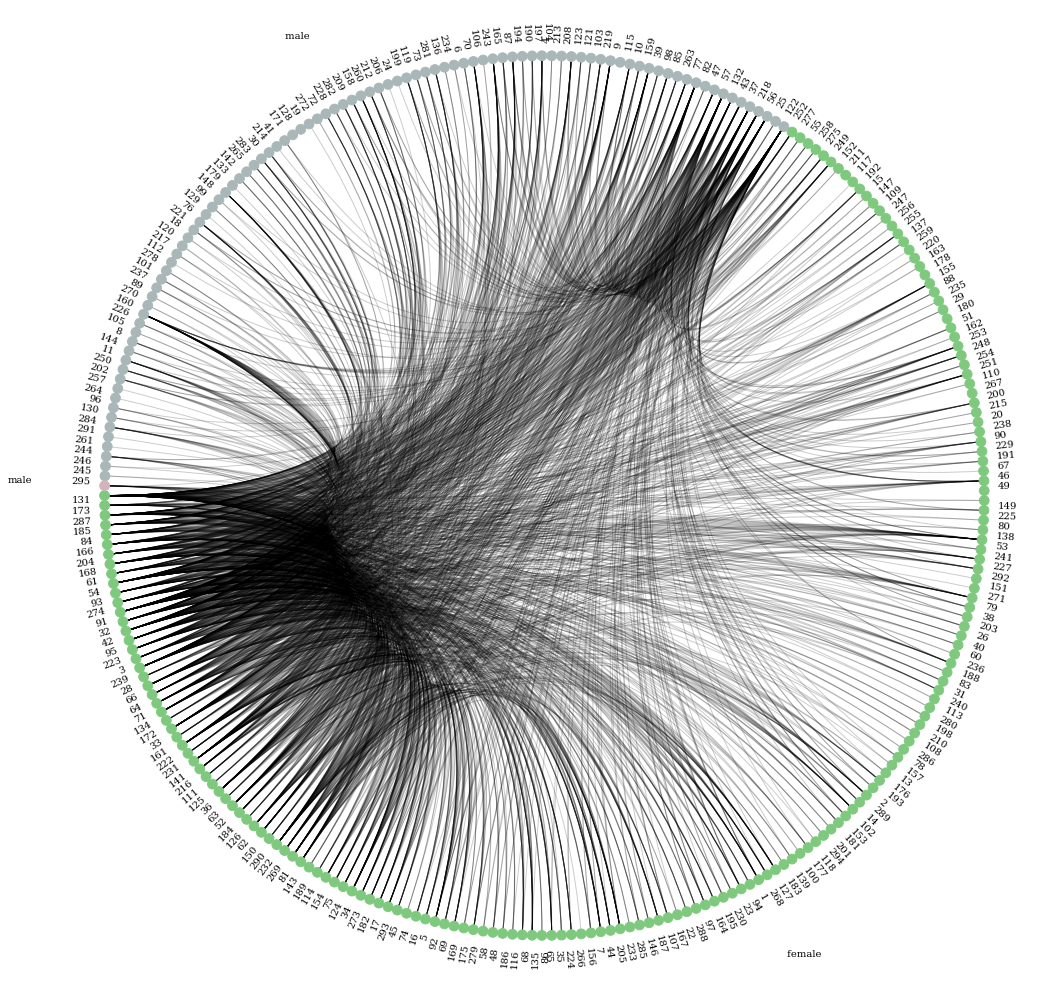

In [268]:
cmt = community.best_partition(G, weight='Weight')
c = nxv.CircosPlot(G, node_color='gender', node_grouping='gender',
                   #edge_width=(edges['Weight'] / edges['Weight'].quantile(0.97)).tolist(),
                   node_labels=True, node_label_layout='rotation',
                   group_label_position="middle", 
                   group_label_offset=12,
                   figsize=(30,18))
c.draw()

## https://blog.datasciencedojo.com/network-theory-game-of-thrones/

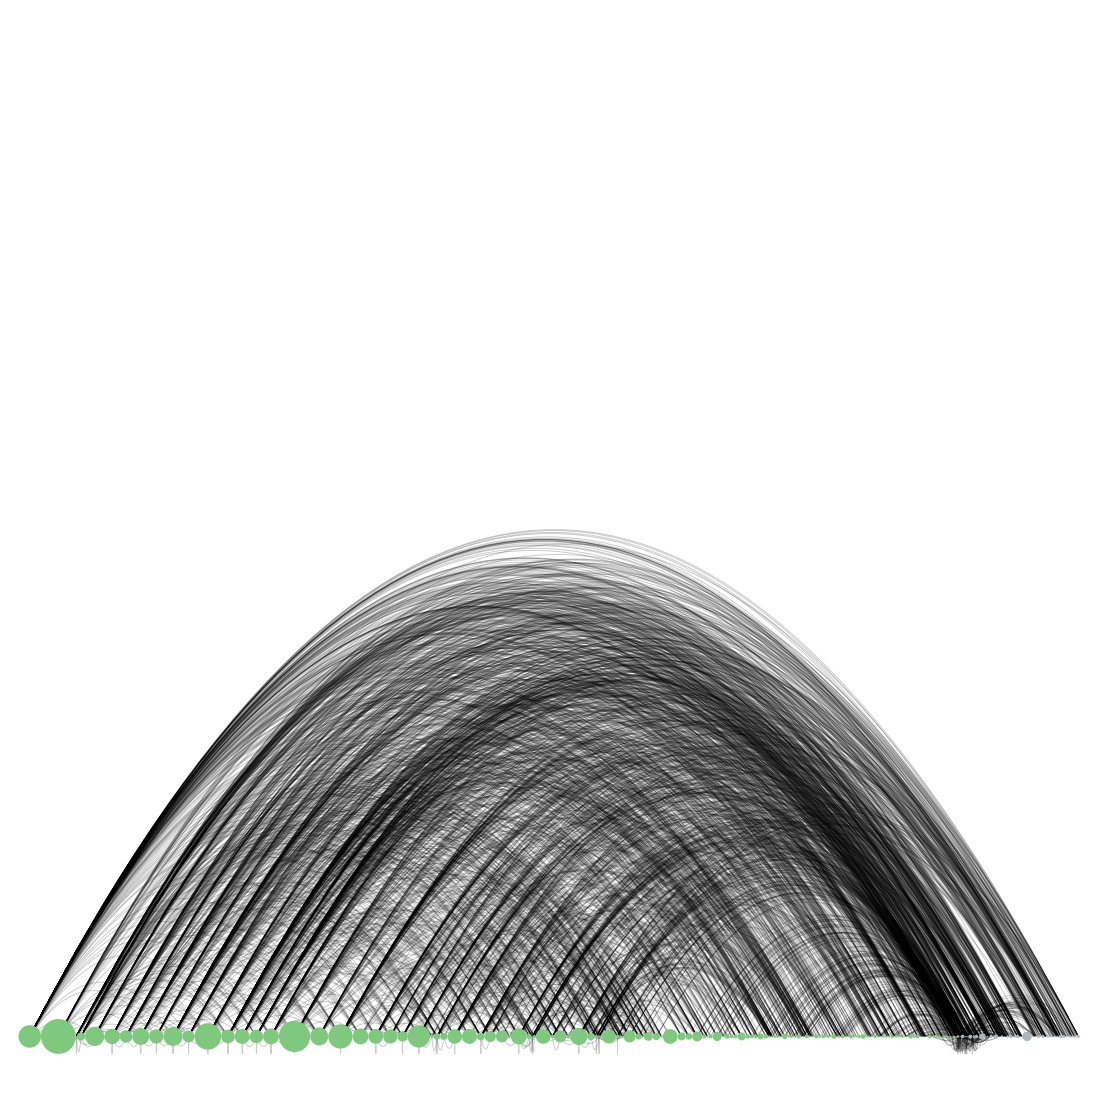

In [269]:
deg_cen = nx.degree_centrality(G)
a = nxv.ArcPlot(G, node_color='gender', node_grouping='gender', 
                node_size=[20*G.nodes[n]['deg_cen'] for n in G.nodes], 
                #edge_width=(edges['Weight'] / edges['Weight'].quantile(.95)).tolist(),
                figsize=(20,20))
a.draw()

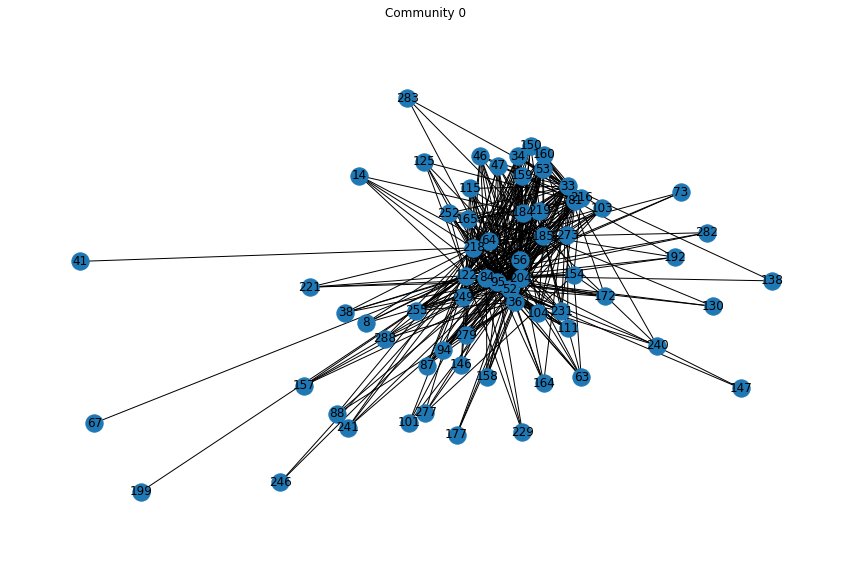

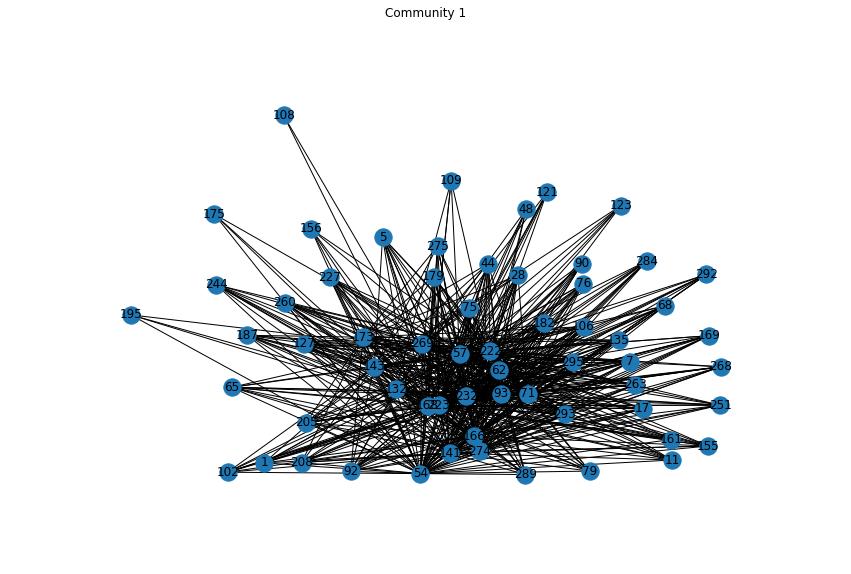

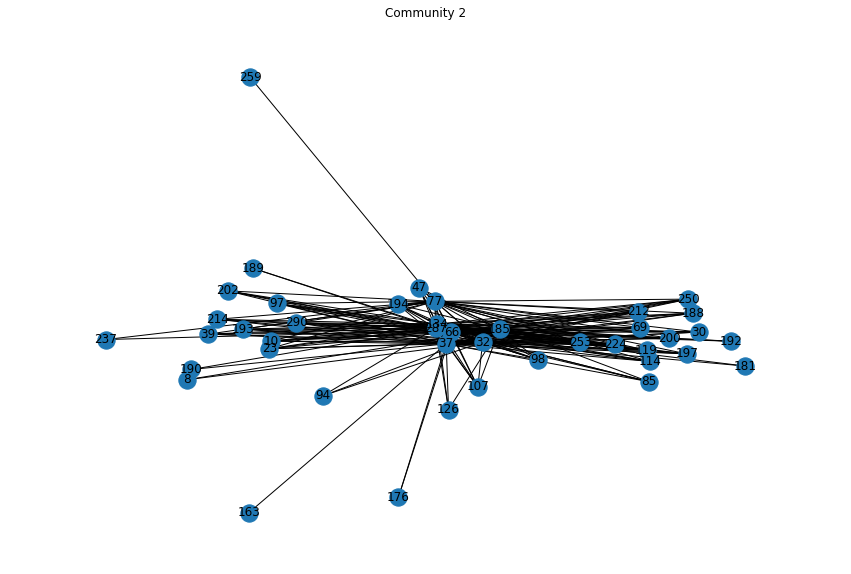

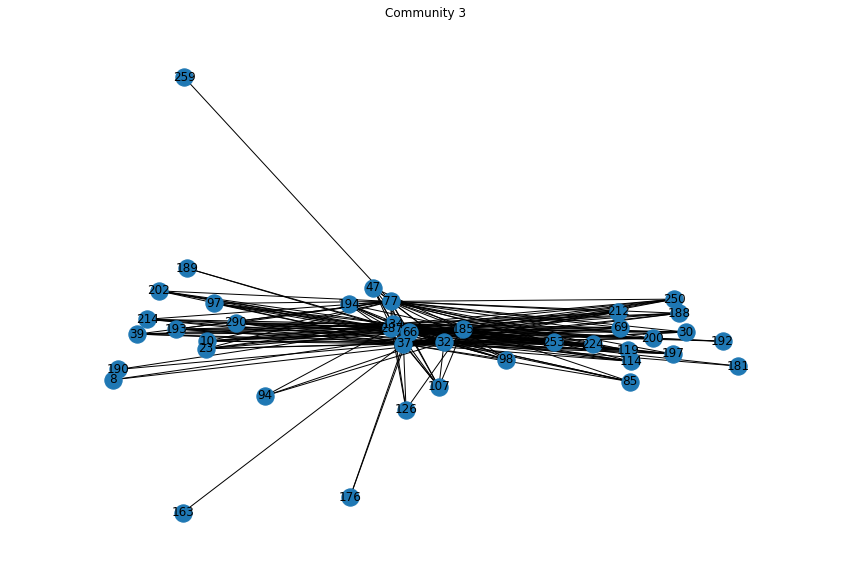

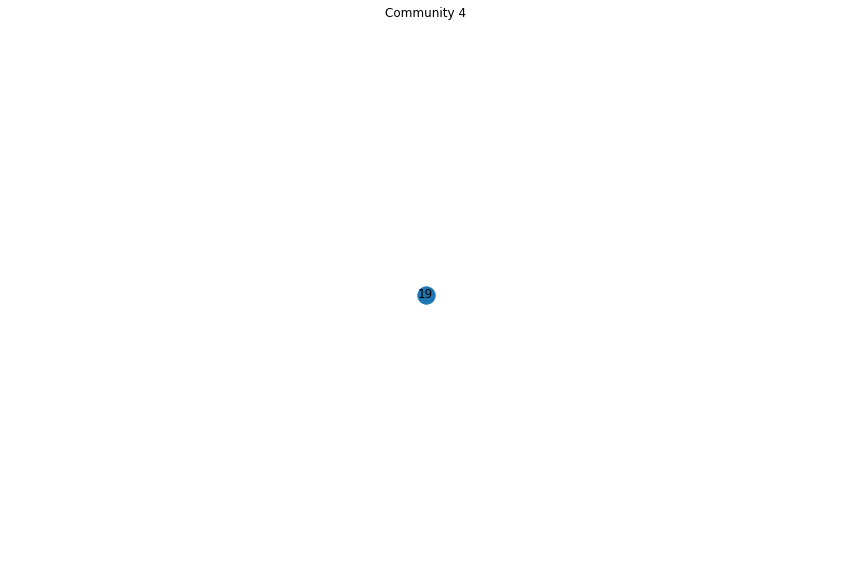

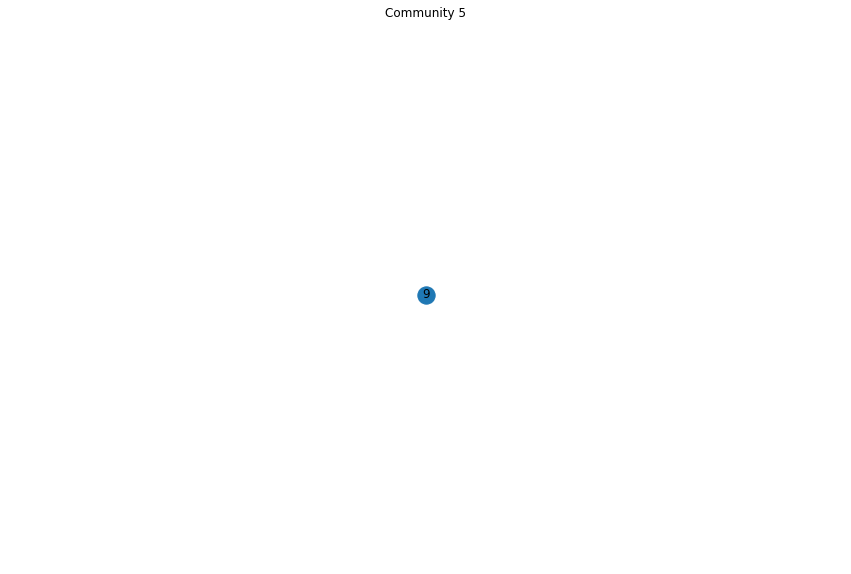

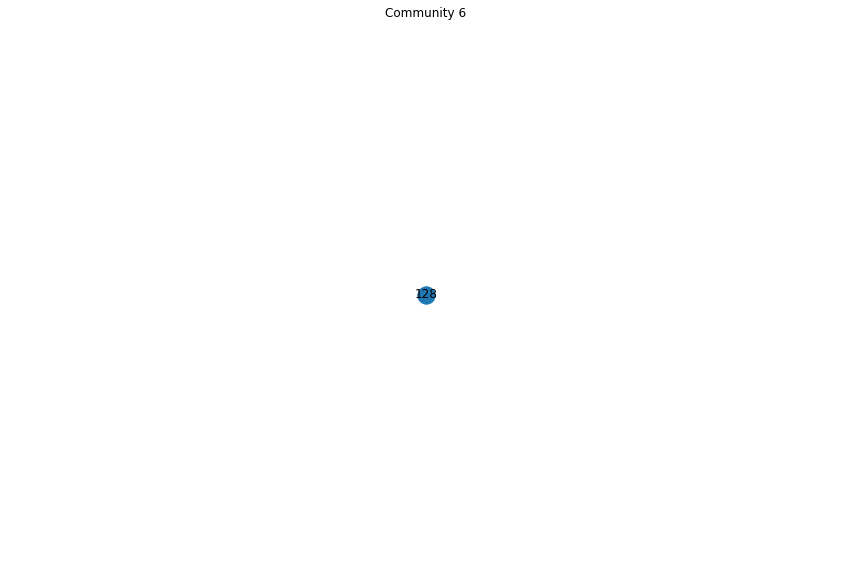

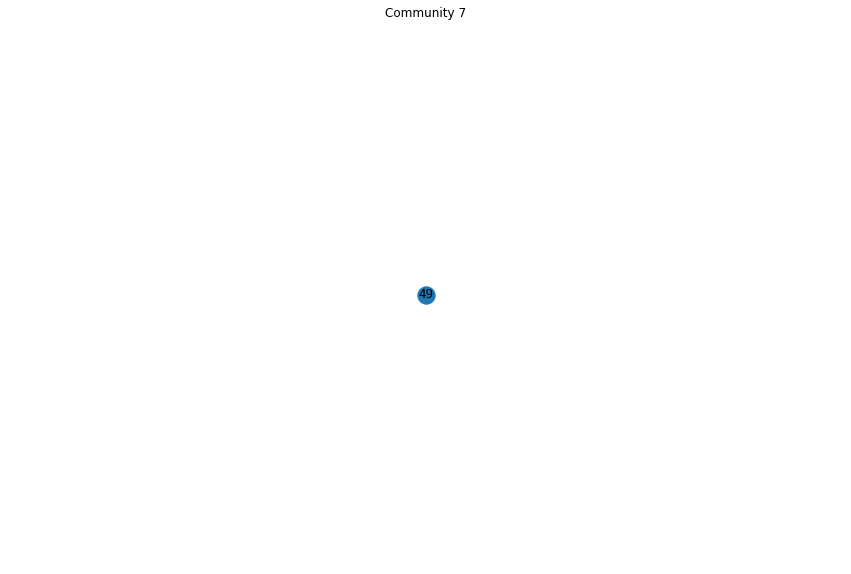

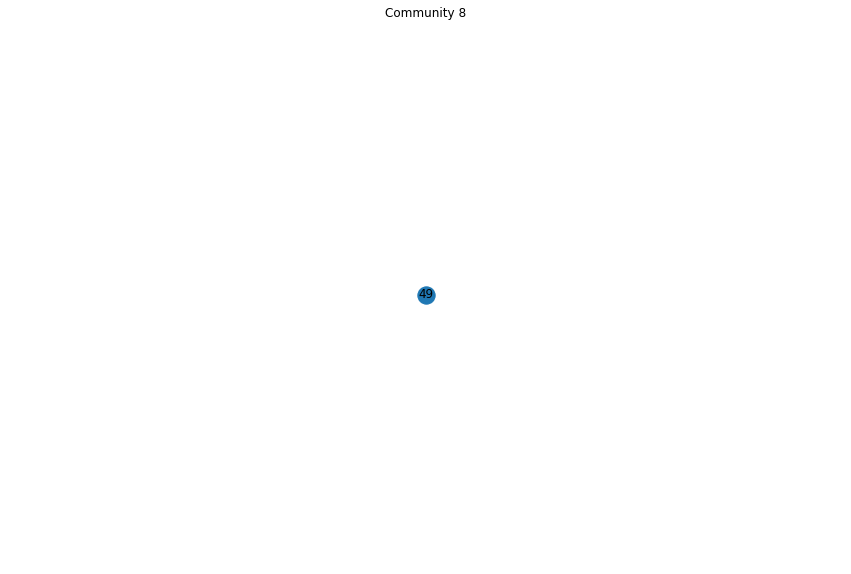

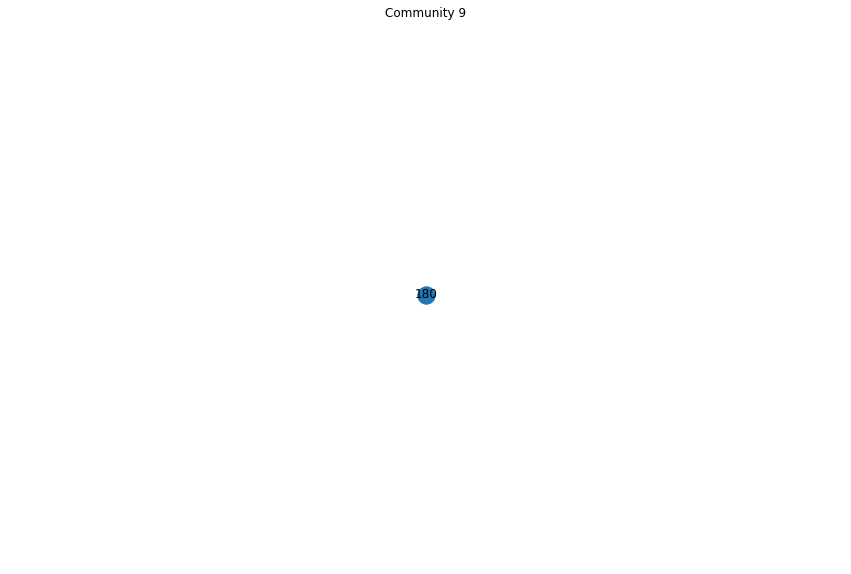

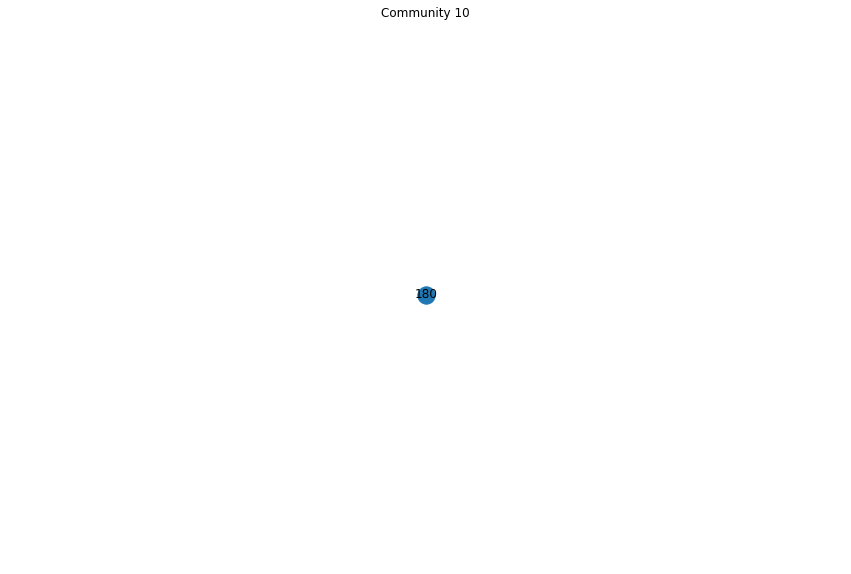

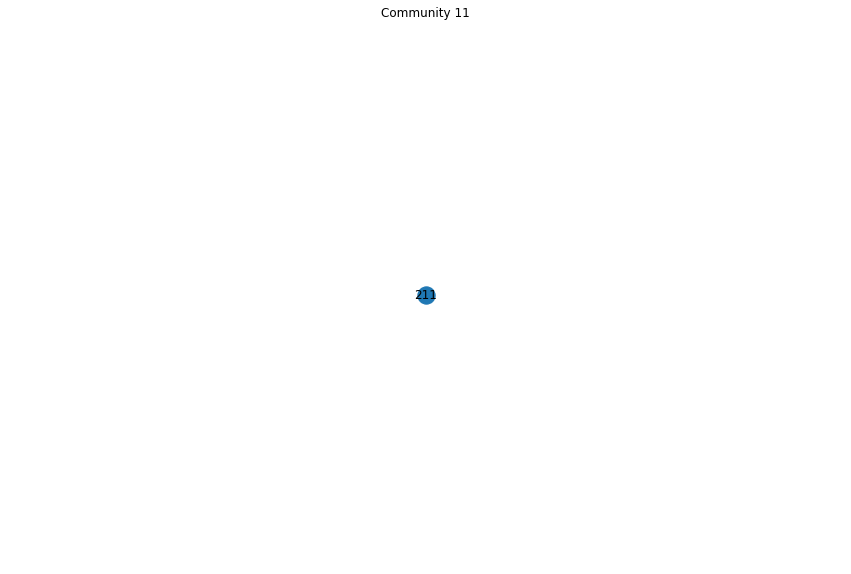

In [278]:
pos = nx.spring_layout(G)  # compute graph layout
for cmt_num in np.unique([v for c,v in cmt.items()]):
    partition = community.best_partition(G)

    nodelist = []
    # one community against the others
    for node, c in partition.items():
        if c == cmt_num:
            nodelist.append(node)
        else:
            partition[node] = -1  # put all the other communities in one communitiy
    
    sg = G.subgraph(nodelist)
   # edge_widths = [sg.edges[e]['Weight'] for e in sg.edges]
   # edge_widths = [w/np.quantile(edge_widths, 0.9) for w in edge_widths]
    
    fig, ax = plt.subplots(figsize=(15,10))
    nx.draw(sg, pos, with_labels=True) #, width=edge_widths)
    ax.set_title(f'Community {cmt_num}');

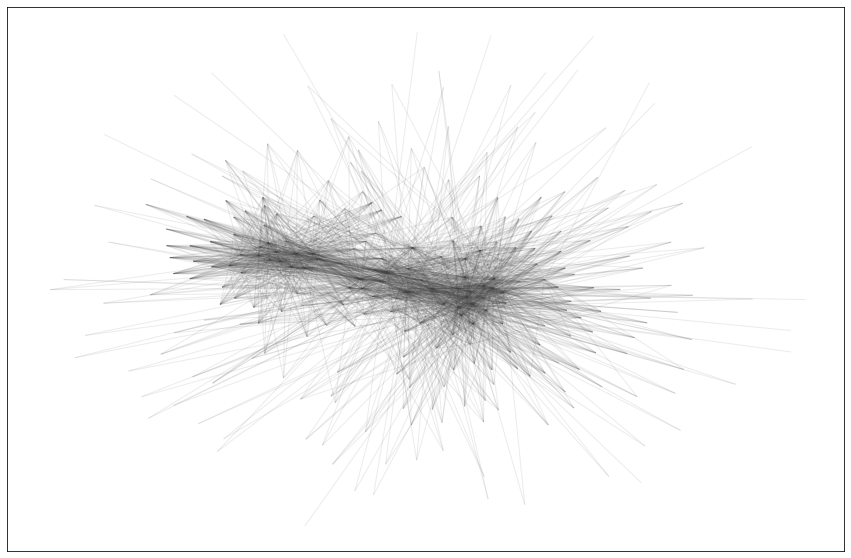

In [289]:
pos = nx.spring_layout(G, k=0.5)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(G, pos=pos, node_size=0, edge_color="#444444", alpha=0.10, with_labels=False)

In [306]:
partition

{'122': -1,
 '131': -1,
 '25': -1,
 '173': -1,
 '287': -1,
 '185': -1,
 '84': -1,
 '166': -1,
 '204': -1,
 '168': -1,
 '61': -1,
 '54': -1,
 '56': -1,
 '218': -1,
 '93': -1,
 '274': -1,
 '91': -1,
 '32': -1,
 '42': -1,
 '95': -1,
 '223': -1,
 '37': -1,
 '3': -1,
 '239': -1,
 '28': -1,
 '43': -1,
 '132': -1,
 '66': -1,
 '57': -1,
 '64': -1,
 '71': -1,
 '134': -1,
 '172': -1,
 '33': -1,
 '47': -1,
 '82': -1,
 '161': -1,
 '222': -1,
 '231': -1,
 '77': -1,
 '263': -1,
 '141': -1,
 '216': -1,
 '111': -1,
 '85': -1,
 '125': -1,
 '36': -1,
 '98': -1,
 '63': -1,
 '39': -1,
 '52': -1,
 '184': -1,
 '126': -1,
 '62': -1,
 '150': -1,
 '290': -1,
 '232': -1,
 '269': -1,
 '159': -1,
 '81': -1,
 '295': -1,
 '10': -1,
 '115': -1,
 '143': -1,
 '189': -1,
 '114': -1,
 '154': -1,
 '75': -1,
 '124': -1,
 '34': -1,
 '273': -1,
 '182': -1,
 '17': -1,
 '9': -1,
 '219': -1,
 '293': -1,
 '45': -1,
 '74': -1,
 '16': -1,
 '103': -1,
 '5': -1,
 '121': -1,
 '123': -1,
 '92': -1,
 '69': -1,
 '169': -1,
 '175': -1,


In [280]:
G.degree('259')

1

In [191]:
#write an edgelist to file
nx.write_edgelist(G,'edgelist.txt')

In [195]:
for i in G.neighbors("121"):
    print(i)

168
54
91
223
132
57
222


In [196]:
df=pd.read_csv('../Data/AccEdgeFile.csv')

In [197]:
#df

,Originator,Recipient
0,122,20
1,122,79
2,122,47
3,122,204
4,122,277
...,...,...
2860,62,135
2861,62,150
2862,62,106
2863,62,223


In [265]:
df['Originator'].unique()

array([122, 131, 287, 204,  61, 166,  42, 185,  84, 168,  54, 218,  93,
        56, 274, 173,  91,  37, 223,  32,  64,  95, 239, 134,  66,   3,
        33, 132,  57, 184, 141, 222,  71, 216, 232,  43, 143, 154,  81,
        77, 269,  36,  52,  62], dtype=int64)